# Market Basket Analysis

#### Objective: Analyzing a retail store's data to identify commonly co-purchased products. This information will assist shopkeepers in organizing products within the physical store for optimal customer convenience.

#### Data

The dataset contains three (3) columns, namely;
- Member_id: A unique identifier used for customers
- Date: Date of purchase
- item description: name of itempurchased 

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
data= pd.read_csv('Market Basket Analysis - Groceries_dataset.csv',parse_dates=['Date'],infer_datetime_format=True)
data.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [104]:
def camel_to_snake(name):
    import re
    name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()

data.columns=[camel_to_snake(col) for col in list(data.columns)]

data.head()

,member_number,date,item_description
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [105]:
data=data.astype({'member_number':object})

In [44]:
#checking for missing values and correct data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   member_number     38765 non-null  object        
 1   date              38765 non-null  datetime64[ns]
 2   item_description  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


There are no missing values and the data has been parsed correctly

In [45]:
#checking for duplicate values
print(f'number of duplicate entries {data.duplicated().sum()}, duplicate entries in percent {round(data.duplicated().sum()/len(data)*100,2)}%\n')
data.info()

number of duplicate entries 759, duplicate entries in percent 1.96%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   member_number     38765 non-null  object        
 1   date              38765 non-null  datetime64[ns]
 2   item_description  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


There are 759 duplicate values in a total of 38765 which is approximately 2 percent of the data.


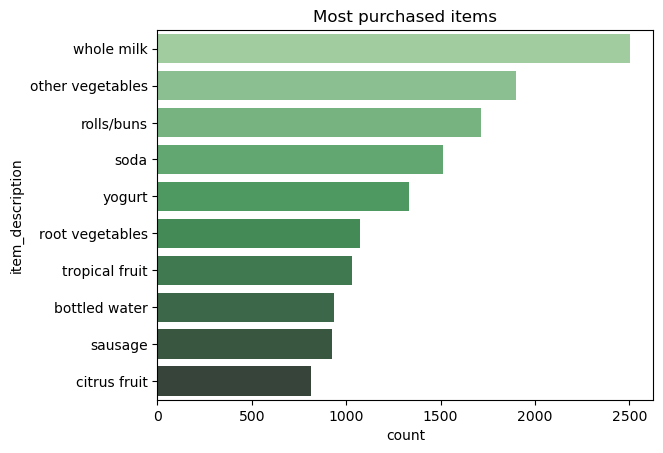

In [46]:
import seaborn as sns

sns.countplot(data,y='item_description',order=data.item_description.value_counts().iloc[:10].index, palette="Greens_d")
plt.title('Most purchased items')
plt.show()

In [55]:
# populating our baskets
data.sort_values(by='member_number')

,member_number,date,item_description
1629,1000,2015-05-27,soda
13331,1000,2014-06-24,whole milk
8395,1000,2015-03-15,whole milk
4843,1000,2015-03-15,sausage
17778,1000,2015-05-27,pickled vegetables
...,...,...,...
34885,5000,2015-02-10,semi-finished bread
25489,5000,2014-11-16,other vegetables
9340,5000,2014-11-16,bottled beer
27877,5000,2014-03-09,onions


In [66]:
basket= data.groupby(['member_number','date','item_description'])['item_description'].count().unstack().fillna(0).reset_index()
basket['id']=range(len(basket))
basket=basket.set_index('id')

In [67]:
basket.head()

item_description,member_number,date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
0,1000,2014-06-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1000,2015-03-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1000,2015-05-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000,2015-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000,2015-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
#if a customer bought more than one item on the same day we will have to encode it to o, so it represents a matrix of what is present in the basket and what's not
# Encoding the items that sold more than 1
def one_hot_encoder(k):
    return int(k>0)

In [69]:
final_basket=basket.iloc[:,3:].applymap(one_hot_encoder)

In [70]:
final_basket.head()

item_description,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
from mlxtend.frequent_patterns import apriori, association_rules 

In [78]:
final_basket=final_basket.astype(bool)

In [101]:
frequent_itemsets = apriori(final_basket, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
1,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
2,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
3,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
4,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
5,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587


From the results:
- other vegetables ---- Frankfurter
- soda ---- sausage
- yogurt ---- sausage 

have strong relationships and hence should be placed close to each other